<a href="https://colab.research.google.com/github/yuyinglu2000/Sepsis-Mortality/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import lightgbm as lgb

# **Data Preprocessing**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Sepsis/Data_after_Cleaning.csv')
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
df.shape

(5208, 48)

In [ ]:
# regroup the race
race_mapping = {
    'WHITE': 'White',
    'HISPANIC OR LATINO': 'Hispanic or Latin',
    'BLACK/AFRICAN AMERICAN': 'Black or African American',
    'BLACK/CARIBBEAN ISLAND': 'Black or African American',
    'HISPANIC/LATINO - DOMINICAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - CENTRAL AMERICAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - GUATEMALAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - PUERTO RICAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - SALVADORAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - HONDURAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - MEXICAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - CUBAN': 'Hispanic or Latin',
    'HISPANIC/LATINO - COLUMBIAN': 'Hispanic or Latin',
    'BLACK/CAPE VERDEAN': 'Black or African American',
    'BLACK/AFRICAN': 'Black or African American',
    'SOUTH AMERICAN': 'Hispanic or Latin',
    'WHITE - BRAZILIAN': 'Hispanic or Latin',
    'WHITE - OTHER EUROPEAN': 'White',
    'WHITE - RUSSIAN': 'White',
    'WHITE - EASTERN EUROPEAN': 'White',
    'ASIAN': 'Others race',
    'ASIAN - SOUTH EAST ASIAN': 'Others race',
    'ASIAN - CHINESE': 'Others race',
    'ASIAN - ASIAN INDIAN': 'Others race',
    'ASIAN - KOREAN': 'Others race',
    'AMERICAN INDIAN/ALASKA NATIVE': 'Others race',
    'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER': 'Others race',
    'MULTIPLE RACE/ETHNICITY': 'Others race',
    'PORTUGUESE': 'Others race',
    'UNKNOWN': 'Others race',
    'OTHER': 'Others race',
    'UNABLE TO OBTAIN': 'Others race',
    'PATIENT DECLINED TO ANSWER': 'Others race'
}

df['race'] = df['race'].map(race_mapping)


KeyError: 'race'

In [ ]:
df['antibiotic'].unique()

KeyError: 'antibiotic'

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# df = ... (your DataFrame)

# Define a mapping for antibiotics to their respective groups
antibiotic_mapping = {
    'Gentamicin Sulfate': 'Aminoglycoside',
    'Tobramycin Sulfate': 'Aminoglycoside',
    'Streptomycin Sulfate': 'Aminoglycoside',
    'Neomycin Sulfate': 'Aminoglycoside',
    'Neomycin/Polymyxin B Sulfate': 'Aminoglycoside',
    'Meropenem': 'Carbapenem',
    'Meropenem Graded Challenge': 'Carbapenem',
    'Vancomycin': 'Glycopeptide',
    'Vancomycin Oral Liquid': 'Glycopeptide',
    'Vancomycin Antibiotic Lock': 'Glycopeptide',
    'Vancomycin Enema': 'Glycopeptide',
    'Vancomycin Intrathecal': 'Glycopeptide',
    'Vancomycin Ora': 'Glycopeptide',
    'Linezolid': 'Oxazolidinone',
    'Linezolid Suspension': 'Oxazolidinone',
    'Penicillin G Benzathine': 'Penicillin',
    'Penicillin G Potassium': 'Penicillin',
    'Penicillin V Potassium': 'Penicillin',
    'Sulfameth/Trimethoprim': 'Sulfonamide',
    'Sulfameth/Trimethoprim DS': 'Sulfonamide',
    'Sulfameth/Trimethoprim SS': 'Sulfonamide',
    'Sulfamethoxazole-Trimethoprim': 'Sulfonamide',
    'Sulfameth/Trimethoprim Suspension': 'Sulfonamide',
    'Tetracycline': 'Tetracycline',
    'Tetracycline HCl': 'Tetracycline'
    # Add more mappings as needed
}

# Applying the mapping to the 'antibiotic' column
df['antibiotic'] = df['antibiotic'].map(antibiotic_mapping)


KeyError: 'antibiotic'

In [6]:
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)
df_dropped = df_encoded.dropna()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   subject_id                           5208 non-null   int64  
 1   hospital_expire_flag                 5208 non-null   int64  
 2   max_age                              5208 non-null   int64  
 3   los_icu                              5208 non-null   float64
 4   first_hosp_stay                      5208 non-null   bool   
 5   suspected_infection                  5208 non-null   int64  
 6   sofa_score                           5208 non-null   int64  
 7   sepsis3                              5208 non-null   bool   
 8   avg_urineoutput                      5208 non-null   float64
 9   glucose_min                          5208 non-null   float64
 10  glucose_max                          5208 non-null   float64
 11  glucose_average               

In [ ]:
empty_values = df_dropped['antibiotic_Tetracycline'].isnull().any()
empty_values

KeyError: 'antibiotic_Tetracycline'

In [ ]:
df.info

<bound method DataFrame.info of       subject_id  hospital_expire_flag  max_age  los_icu  first_hosp_stay  \
0       19986715                     0       24    10.58             True   
1       19973083                     0       58     2.33             True   
2       19907774                     1       65     1.83             True   
3       19894745                     1       76     1.08             True   
4       19884808                     1       64    20.46             True   
...          ...                   ...      ...      ...              ...   
5203    10367216                     0       39     3.79             True   
5204    10264575                     0       79     2.38             True   
5205    10196711                     0       76     3.00             True   
5206    10131753                     0       69     1.04             True   
5207    10029057                     0       89     3.25             True   

      suspected_infection  sofa_score  sepsis3  avg_urineoutput  glucose_min  \
0                       1           2     True       136.657143         82.0   
1                       1           8     True        34.263158         94.0   
2                       1           2     True       105.476191         65.0   
3                       1           4     True        34.000000        267.0   
4                       1           5     True       107.229508        146.0   
...                   ...         ...      ...              ...          ...   
5203                    1           3     True       178.636364         93.0   
5204                    1           4     True       153.333333         94.0   
5205                    1           4     True       131.052632        105.0   
5206                    1           3     True       102.692308         82.0   
5207                    1           3     True        62.000000         72.0   

      ...  race_HispanicorLatin  race_Othersrace  race_White  \
0     ...                     0                0           0   
1     ...                     0                0           0   
2     ...                     0                0           0   
3     ...                     0                0           0   
4     ...                     0                0           0   
...   ...                   ...              ...         ...   
5203  ...                     0                0           1   
5204  ...                     0                0           1   
5205  ...                     0                0           1   
5206  ...                     0                0           1   
5207  ...                     0                0           1   

      antibiotic_Vancomycin  antibiotic_VancomycinAntibioticLock  \
0                         1                                    0   
1                         1                                    0   
2                         1                                    0   
3                         1                                    0   
4                         1                                    0   
...                     ...                                  ...   
5203                      0                                    0   
5204                      0                                    0   
5205                      0                                    0   
5206                      0                                    0   
5207                      0                                    0   

      antibiotic_VancomycinEnema  antibiotic_VancomycinIntrathecal  \
0                              0                                 0   
1                              0                                 0   
2                              0                                 0   
3                              0                                 0   
4                              0                                 0   
...                          ...                               ...   
5203  

# **drop duplications**

In [7]:
duplicated_rows_mask = df_dropped['subject_id'].duplicated(keep=False)

# Extract the duplicated rows
duplicated_rows = df_dropped[duplicated_rows_mask]
new_data  = df_dropped.drop_duplicates()
duplicated_rows_mask = new_data['subject_id'].duplicated(keep=False)

# Extract the duplicated rows
duplicated_rows = new_data[duplicated_rows_mask]
# Separate out columns based on data types
int_float_cols = new_data.select_dtypes(include=['int64', 'float64']).columns
uint8_cols = new_data.select_dtypes(include=['uint8']).columns

# Sort dataframe
# For int and float columns: sort in descending order so that larger values come first
df = new_data.sort_values(by=list(int_float_cols), ascending=False)

# For uint8 columns: sort in descending order so that 1 comes before 0
df = df.sort_values(by=list(uint8_cols), ascending=False)

# Drop duplicates based on subject_id, keeping the first (which are the desired rows after sorting)
df_reduced = df.drop_duplicates(subset='subject_id', keep='first')

# Reset index if needed
df_reduced = df_reduced.reset_index(drop=True)
pd.set_option('display.max_columns', None)
df_reduced

,subject_id,hospital_expire_flag,max_age,los_icu,first_hosp_stay,suspected_infection,sofa_score,sepsis3,avg_urineoutput,glucose_min,glucose_max,glucose_average,sodium_max,sodium_min,sodium_average,diabetes_without_cc,diabetes_with_cc,severe_liver_disease,aids,renal_disease,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,spo2_min,spo2_max,spo2_mean,coma,albumin,race_BlackorAfricanAmerican,race_HispanicorLatin,race_Othersrace,race_White,antibiotic_Vancomycin,antibiotic_VancomycinAntibioticLock,antibiotic_VancomycinEnema,antibiotic_VancomycinIntrathecal,antibiotic_VancomycinOralLiquid,gender_F,gender_M
0,19997886,0,72,2.00,True,1,5,True,120.882353,123.0,140.0,131.500000,140.0,131.0,135.500000,0,0,1,0,0,81,99,91.708333,82.0,116.0,99.166667,48.0,64.0,57.083333,14.0,27.0,20.125000,93,100,96.375000,1,4.4,0,0,0,1,0,0,0,0,1,0,1
1,19997293,0,76,10.54,True,1,5,True,170.728814,116.0,199.0,157.900000,142.0,129.0,138.300000,1,0,0,0,1,36,112,69.683501,40.0,189.0,111.615385,22.0,119.0,58.724924,9.0,33.0,18.913240,68,100,95.513081,1,1.9,0,0,0,1,1,0,0,0,0,0,1
2,19995127,0,83,2.96,True,1,3,True,331.750000,78.0,108.0,94.500000,141.0,137.0,139.250000,0,0,0,0,0,80,117,96.040741,89.0,145.0,116.160000,50.0,87.0,69.380000,15.0,34.0,21.915556,90,100,96.417778,0,4.1,1,0,0,0,0,0,0,0,1,0,1
3,19994379,0,71,2.92,True,1,6,True,320.833333,80.0,141.0,115.166667,138.0,126.0,132.833333,0,0,0,0,1,67,132,88.354338,69.0,117.0,93.547025,44.0,160.0,63.192259,8.0,30.0,16.663109,86,100,94.621264,0,3.8,0,0,0,1,0,0,0,0,1,0,1
4,19993726,0,52,9.04,True,1,2,True,159.777778,117.0,165.0,141.000000,139.0,137.0,138.000000,0,0,0,0,0,102,146,121.260870,72.5,136.0,101.510417,44.0,74.0,58.354167,12.0,33.0,19.112245,96,100,99.826087,0,2.4,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,10004720,1,64,5.08,True,1,8,True,46.315789,128.0,182.0,155.000000,136.0,134.0,135.000000,0,0,0,0,0,68,86,73.955556,86.0,154.0,103.415094,47.0,88.0,57.377358,10.0,17.0,14.990741,93,100,98.094340,1,2.5,0,0,0,1,1,0,0,0,0,0,1
5204,10003400,1,75,12.92,True,1,3,True,121.916667,97.0,148.0,113.166667,141.0,128.0,134.000000,0,0,0,0,1,80,156,108.978900,55.0,142.0,102.811850,21.0,109.0,64.808162,12.0,33.0,18.406541,87,100,99.343939,0,2.4,1,0,0,0,1,0,0,0,0,1,0
5205,10002428,0,85,7.00,True,1,4,True,159.242424,93.0,183.0,124.625000,144.0,128.0,135.500000,0,0,0,0,0,67,135,99.623583,48.0,163.0,100.786261,19.0,116.0,54.326280,16.0,34.0,22.675189,73,100,98.395904,0,4.1,0,0,0,1,1,0,0,0,0,1,0
5206,10002155,1,83,6.21,True,1,2,True,154.318182,95.0,235.0,137.333333,140.0,120.0,132.500000,0,0,0,0,1,65,142,91.539722,66.0,135.0,106.397876,23.0,70.0,50.366830,10.0,37.0,17.472500,80,100,94.055833,0,3.6,0,0,0,1,1,0,0,0,0,1,0


# **Model Training**

In [8]:
X = df_reduced.drop(columns=['hospital_expire_flag','subject_id','first_hosp_stay','suspected_infection','sepsis3'])
y = df_reduced['hospital_expire_flag']

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
count_of_ones = y.sum()

count_of_ones

1203

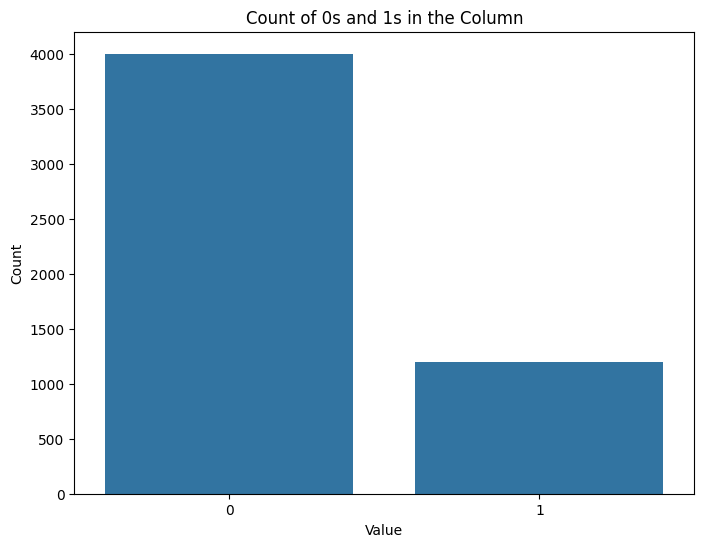

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y' is your column and 'df' is your DataFrame
total_rows = len(df_reduced)
count_of_ones = y.sum()
count_of_zeros = total_rows - count_of_ones

# Preparing data for the bar chart
data = {'Count': [count_of_zeros, count_of_ones], 'Value': ['0', '1']}

# Creating the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Value', y='Count', data=data)
plt.title('Count of 0s and 1s in the Column')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


In [ ]:
!pip install scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
import tensorflow as tf
tf.autograph.set_verbosity(0)
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

BILSTM = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(len(X_train), 1)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

BILSTM.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
tf.config.run_functions_eagerly(True)

In [12]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

classifiers = {
    # 'BILSTM': KerasClassifier(build_fn=lambda : BILSTM,epochs = 200,batch_size=256),
    'SVC': SVC(probability=True, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'XGB': XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42),
}

In [13]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

def f2_score(precision, recall):
    return 5 * (precision * recall) / ((4 * precision) + recall)

# Iterating through each classifier
for name, clf in classifiers.items():
    # Fit model
    clf.fit(X_train, y_train)

    # Predict probabilities and labels
    y_scores_test = clf.predict_proba(X_test)[:, 1]
    y_pred_binary = (y_scores_test > 0.5).astype(int)

    # Calculate metrics
    auc_test = roc_auc_score(y_test, y_scores_test)
    accuracy_test = accuracy_score(y_test, y_pred_binary)
    f1_test = f1_score(y_test, y_pred_binary)
    precision_test = precision_score(y_test, y_pred_binary)
    recall_test = recall_score(y_test, y_pred_binary)
    f2_test = f2_score(precision_test, recall_test)

    # Print results
    print(f"{name}: Test AUC = {auc_test:.4f}, Test Accuracy = {accuracy_test:.4f}, "
          f"F1 Score = {f1_test:.4f}, Precision = {precision_test:.4f}, "
          f"Recall = {recall_test:.4f}, F2 Score = {f2_test:.4f}")

SVC: Test AUC = 0.7057, Test Accuracy = 0.6436, F1 Score = 0.6407, Precision = 0.6307, Recall = 0.6509, F2 Score = 0.6468
DecisionTree: Test AUC = 0.7421, Test Accuracy = 0.7416, F1 Score = 0.7432, Precision = 0.7217, Recall = 0.7660, F2 Score = 0.7567
RandomForest: Test AUC = 0.9377, Test Accuracy = 0.8658, F1 Score = 0.8562, Precision = 0.8976, Recall = 0.8184, F2 Score = 0.8331
GradientBoosting: Test AUC = 0.8889, Test Accuracy = 0.8040, F1 Score = 0.7813, Precision = 0.8578, Recall = 0.7174, F2 Score = 0.7417
MLP: Test AUC = 0.8660, Test Accuracy = 0.7640, F1 Score = 0.7038, Precision = 0.9089, Recall = 0.5742, F2 Score = 0.6198
XGB: Test AUC = 0.9178, Test Accuracy = 0.8427, F1 Score = 0.8316, Precision = 0.8711, Recall = 0.7954, F2 Score = 0.8095
[LightGBM] [Info] Number of positive: 3223, number of negative: 3185
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Light

In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

def f2_score(precision, recall):
    return 5 * (precision * recall) / ((4 * precision) + recall)

# Iterating through each classifier
for name, clf in classifiers.items():
    # Fit model on training data
    clf.fit(X_train, y_train)

    # Predict probabilities and labels for both train and test datasets
    y_scores_train = clf.predict_proba(X_train)[:, 1]
    y_pred_binary_train = (y_scores_train > 0.5).astype(int)

    y_scores_test = clf.predict_proba(X_test)[:, 1]
    y_pred_binary_test = (y_scores_test > 0.5).astype(int)

    # Calculate metrics for train dataset
    auc_train = roc_auc_score(y_train, y_scores_train)
    accuracy_train = accuracy_score(y_train, y_pred_binary_train)
    f1_train = f1_score(y_train, y_pred_binary_train)
    precision_train = precision_score(y_train, y_pred_binary_train)
    recall_train = recall_score(y_train, y_pred_binary_train)
    sensitivity_train = recall_train  # Sensitivity is the same as Recall
    f2_train = f2_score(precision_train, recall_train)

    # Calculate metrics for test dataset
    auc_test = roc_auc_score(y_test, y_scores_test)
    accuracy_test = accuracy_score(y_test, y_pred_binary_test)
    f1_test = f1_score(y_test, y_pred_binary_test)
    precision_test = precision_score(y_test, y_pred_binary_test)
    recall_test = recall_score(y_test, y_pred_binary_test)
    sensitivity_test = recall_test  # Sensitivity is the same as Recall
    f2_test = f2_score(precision_test, recall_test)

    # Print results for both train and test datasets
    print(f"{name}: Train AUC = {auc_train:.4f}, Train Accuracy = {accuracy_train:.4f}, "
          f"Train F1 Score = {f1_train:.4f}, Train Precision = {precision_train:.4f}, "
          f"Train Recall = {recall_train:.4f}, Train Sensitivity = {sensitivity_train:.4f}, Train F2 Score = {f2_train:.4f}")

    print(f"{name}: Test AUC = {auc_test:.4f}, Test Accuracy = {accuracy_test:.4f}, "
          f"Test F1 Score = {f1_test:.4f}, Test Precision = {precision_test:.4f}, "
          f"Test Recall = {recall_test:.4f}, Test Sensitivity = {sensitivity_test:.4f}, Test F2 Score = {f2_test:.4f}")




SVC: Train AUC = 0.7115, Train Accuracy = 0.6489, Train F1 Score = 0.6535, Train Precision = 0.6487, Train Recall = 0.6584, Train Sensitivity = 0.6584, Train F2 Score = 0.6564
SVC: Test AUC = 0.7057, Test Accuracy = 0.6436, Test F1 Score = 0.6407, Test Precision = 0.6307, Test Recall = 0.6509, Test Sensitivity = 0.6509, Test F2 Score = 0.6468
DecisionTree: Train AUC = 1.0000, Train Accuracy = 1.0000, Train F1 Score = 1.0000, Train Precision = 1.0000, Train Recall = 1.0000, Train Sensitivity = 1.0000, Train F2 Score = 1.0000
DecisionTree: Test AUC = 0.7421, Test Accuracy = 0.7416, Test F1 Score = 0.7432, Test Precision = 0.7217, Test Recall = 0.7660, Test Sensitivity = 0.7660, Test F2 Score = 0.7567
RandomForest: Train AUC = 1.0000, Train Accuracy = 1.0000, Train F1 Score = 1.0000, Train Precision = 1.0000, Train Recall = 1.0000, Train Sensitivity = 1.0000, Train F2 Score = 1.0000
RandomForest: Test AUC = 0.9377, Test Accuracy = 0.8658, Test F1 Score = 0.8562, Test Precision = 0.8976, T

# **AUC & ROC**

In [15]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
import numpy as np

num_folds = 5  # Reduced number of folds for faster execution
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

auc_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')

# Select five specific models
selected_classifiers = {
    'SVC': classifiers['SVC'],
    'DecisionTree' : classifiers['DecisionTree'],
    'RandomForest': classifiers['RandomForest'],
    'GradientBoosting': classifiers['GradientBoosting'],
    'XGB': classifiers['XGB'],
    'MLP': classifiers['MLP'],
    'LGBM': classifiers['LGBM'],
    # 'BILSTM': classifiers['BILSTM']
}

results = {}
for name, clf in selected_classifiers.items():
    scores = cross_validate(clf, X_smote, y_smote, cv=kf, scoring={'auc': auc_scorer}, n_jobs=-1)
    results[name] = {'AUC': np.mean(scores['test_auc'])}

# Print results
for name, metrics in results.items():
    print(f"{name}: AUC = {metrics['AUC']:.4f}")

SVC: AUC = 0.7023
DecisionTree: AUC = 0.7450
RandomForest: AUC = 0.9336
GradientBoosting: AUC = 0.8984
XGB: AUC = 0.9175
MLP: AUC = 0.8616
LGBM: AUC = 0.9164


***Confidence Interval***

In [16]:
from scipy.stats import sem, t
from sklearn.model_selection import cross_val_score
import numpy as np

confidence_level = 0.95
degrees_freedom = 5 - 1  # degrees of freedom for t-distribution
t_critical = t.ppf((1 + confidence_level) / 2, degrees_freedom)  # t-critical value for 95% CI

results_with_confidence_interval = {}

for name, clf in selected_classifiers.items():
    # Get cross-validated scores for each metric
    auc_scores = cross_val_score(clf, X_smote, y_smote, cv=kf, scoring=auc_scorer, n_jobs=-1)


    # Calculate means
    auc_mean = np.mean(auc_scores)


    # Calculate standard errors
    auc_sem = sem(auc_scores)

    # Calculate confidence intervals
    auc_conf_interval = (auc_mean - t_critical * auc_sem, auc_mean + t_critical * auc_sem)
    # acc_conf_interval = (acc_mean - t_critical * acc_sem, acc_mean + t_critical * acc_sem)

    # Store the results
    results_with_confidence_interval[name] = {
        'AUC Mean': auc_mean,
        'AUC 95% CI': auc_conf_interval
        # 'Accuracy Mean': acc_mean,
        # 'Accuracy 95% CI': acc_conf_interval
    }

# Print the results with confidence intervals
for name, metrics in results_with_confidence_interval.items():
    print(f"{name}: AUC = {metrics['AUC Mean']:.4f} (95% CI: {metrics['AUC 95% CI']})")
    # print(f"{name}: Accuracy = {metrics['Accuracy Mean']:.4f} (95% CI: {metrics['Accuracy 95% CI']})")


SVC: AUC = 0.7023 (95% CI: (0.689190101815387, 0.7155082515877038))
DecisionTree: AUC = 0.7450 (95% CI: (0.7225338989889066, 0.7673795622181784))
RandomForest: AUC = 0.9336 (95% CI: (0.9282366355983722, 0.938936882559193))
GradientBoosting: AUC = 0.8984 (95% CI: (0.8884522380294869, 0.9082795254045161))
XGB: AUC = 0.9175 (95% CI: (0.9098945817361368, 0.9250650175295303))
MLP: AUC = 0.8616 (95% CI: (0.845803923231629, 0.8774545175134874))
LGBM: AUC = 0.9164 (95% CI: (0.9072236023984972, 0.9254781663021177))


***visualization***

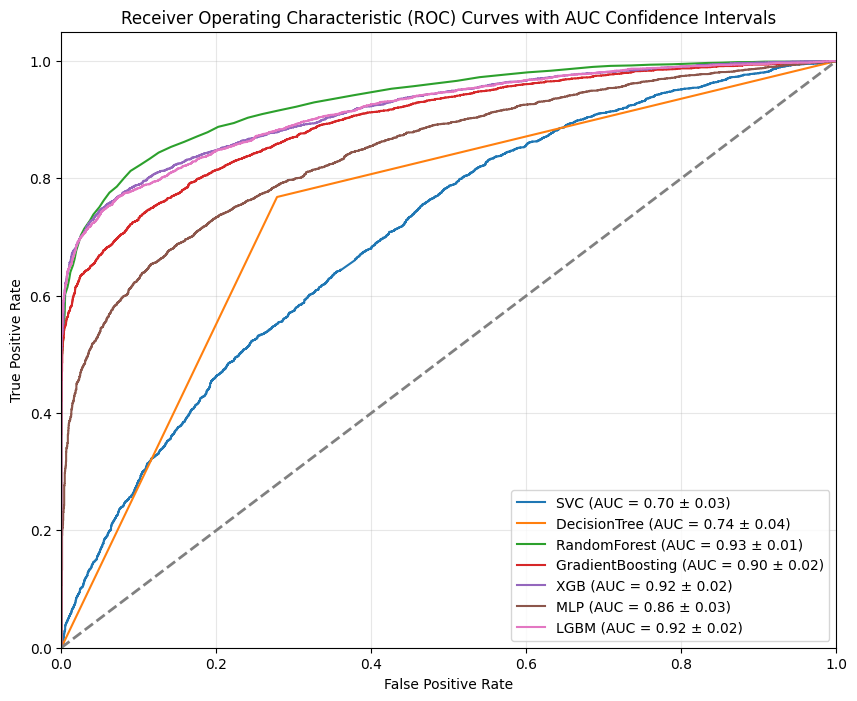

In [21]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

selected_classifiers = {
    'SVC': classifiers['SVC'],
    'DecisionTree' : classifiers['DecisionTree'],
    'RandomForest': classifiers['RandomForest'],
    'GradientBoosting': classifiers['GradientBoosting'],
    'XGB': classifiers['XGB'],
    'MLP': classifiers['MLP'],
    'LGBM': classifiers['LGBM'],
    # 'BILSTM': classifiers['BILSTM']
}

# Define a dictionary to store ROC curve data for each classifier
roc_curves = {}

# Loop through selected classifiers
for name, clf in selected_classifiers.items():
    # Perform cross-validation and get predicted probabilities
    y_scores = cross_val_predict(clf, X_smote, y_smote, cv=kf, method='predict_proba', n_jobs=-1)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_smote, y_scores)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data in the dictionary
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

plt.figure(figsize=(10, 8))

for name, roc_curve_data in roc_curves.items():
    fpr, tpr, roc_auc = roc_curve_data['fpr'], roc_curve_data['tpr'], roc_curve_data['roc_auc']
    mean_auc = results_with_confidence_interval[name]['AUC Mean']
    lower, upper = results_with_confidence_interval[name]['AUC 95% CI']

    # Modify the label string to include AUC and confidence interval
    label = f'{name} (AUC = {mean_auc:.2f} ± {upper - lower:.2f})'

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=label)



# Plot the random chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with AUC Confidence Intervals')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("Receiver Operating Characteristic.pdf", format="pdf", bbox_inches="tight")
plt.show()


SVC: CV AUC Mean = 0.6233, CV Accuracy Mean = 0.5933, CV F1 Score Mean = 0.6139, CV Precision Mean = 0.5863, CV Recall Mean = 0.6443, CV Sensitivity Mean = 0.6443
DecisionTree: CV AUC Mean = 0.6893, CV Accuracy Mean = 0.6895, CV F1 Score Mean = 0.7011, CV Precision Mean = 0.6781, CV Recall Mean = 0.7257, CV Sensitivity Mean = 0.7257
RandomForest: CV AUC Mean = 0.9002, CV Accuracy Mean = 0.8196, CV F1 Score Mean = 0.8213, CV Precision Mean = 0.8167, CV Recall Mean = 0.8259, CV Sensitivity Mean = 0.8259
GradientBoosting: CV AUC Mean = 0.8740, CV Accuracy Mean = 0.7920, CV F1 Score Mean = 0.7936, CV Precision Mean = 0.7903, CV Recall Mean = 0.7970, CV Sensitivity Mean = 0.7970
XGB: CV AUC Mean = 0.9198, CV Accuracy Mean = 0.8374, CV F1 Score Mean = 0.8352, CV Precision Mean = 0.8497, CV Recall Mean = 0.8212, CV Sensitivity Mean = 0.8212
MLP: CV AUC Mean = 0.6800, CV Accuracy Mean = 0.6300, CV F1 Score Mean = 0.6488, CV Precision Mean = 0.6195, CV Recall Mean = 0.6810, CV Sensitivity Mean 

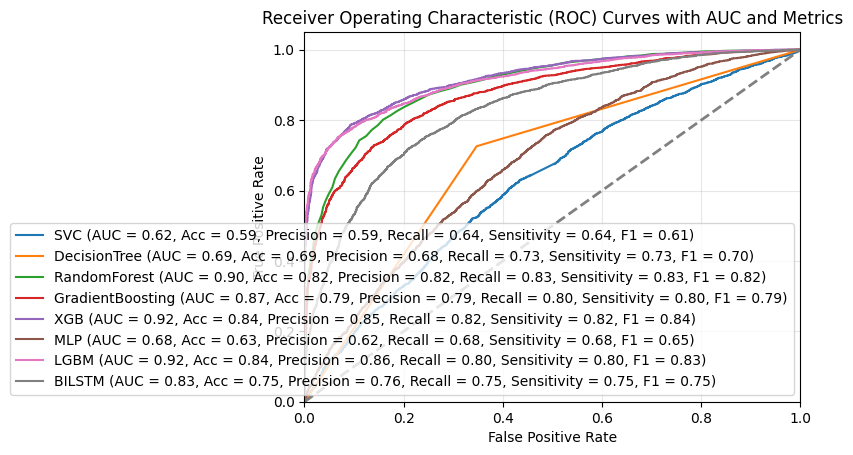

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

selected_classifiers = {
    'SVC': classifiers['SVC'],
    'DecisionTree' : classifiers['DecisionTree'],
    'RandomForest': classifiers['RandomForest'],
    'GradientBoosting': classifiers['GradientBoosting'],
    'XGB': classifiers['XGB'],
    'MLP': classifiers['MLP'],
    'LGBM': classifiers['LGBM'],
    #'BILSTM': classifiers['BILSTM']
}

# Define a dictionary to store ROC curve data and other metrics for each classifier
roc_curves_and_metrics = {}

# Loop through selected classifiers
for name, clf in selected_classifiers.items():
    # Perform cross-validation and get predicted probabilities
    y_scores_cv = cross_val_predict(clf, X_train, y_train, cv=kf, method='predict_proba', n_jobs=-1)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_train, y_scores_cv)
    roc_auc = auc(fpr, tpr)

    # Calculate other metrics
    y_pred_cv = (y_scores_cv > 0.5).astype(int)
    accuracy_mean_cv = accuracy_score(y_train, y_pred_cv)
    precision_mean_cv = precision_score(y_train, y_pred_cv)
    recall_mean_cv = recall_score(y_train, y_pred_cv)
    sensitivity_mean_cv = recall_mean_cv  # Sensitivity is the same as Recall
    f1_mean_cv = f1_score(y_train, y_pred_cv)

    # Store ROC curve data and metrics in the dictionary
    roc_curves_and_metrics[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'accuracy_mean_cv': accuracy_mean_cv,
        'precision_mean_cv': precision_mean_cv,
        'recall_mean_cv': recall_mean_cv,
        'sensitivity_mean_cv': sensitivity_mean_cv,
        'f1_mean_cv': f1_mean_cv
    }

# Print cross-validation results
for name, data in roc_curves_and_metrics.items():
    fpr, tpr, roc_auc = data['fpr'], data['tpr'], data['roc_auc']
    accuracy_mean_cv, precision_mean_cv, recall_mean_cv, sensitivity_mean_cv, f1_mean_cv = data['accuracy_mean_cv'], data['precision_mean_cv'], data['recall_mean_cv'], data['sensitivity_mean_cv'], data['f1_mean_cv']

    # Modify the label string to include AUC and other metrics
    label = f'{name} (AUC = {roc_auc:.2f}, Acc = {accuracy_mean_cv:.2f}, Precision = {precision_mean_cv:.2f}, Recall = {recall_mean_cv:.2f}, Sensitivity = {sensitivity_mean_cv:.2f}, F1 = {f1_mean_cv:.2f})'

    # Plot the ROC curve (optional, can be removed if not needed)
    plt.plot(fpr, tpr, label=label)

    # Print metrics for cross-validation
    print(f"{name}: CV AUC Mean = {roc_auc:.4f}, "
          f"CV Accuracy Mean = {accuracy_mean_cv:.4f}, "
          f"CV F1 Score Mean = {f1_mean_cv:.4f}, "
          f"CV Precision Mean = {precision_mean_cv:.4f}, "
          f"CV Recall Mean = {recall_mean_cv:.4f}, "
          f"CV Sensitivity Mean = {sensitivity_mean_cv:.4f}")

# Plot the random chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves with AUC and Metrics')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# **Feature Importance & SHAP Value**

***Feature Importance using best model***

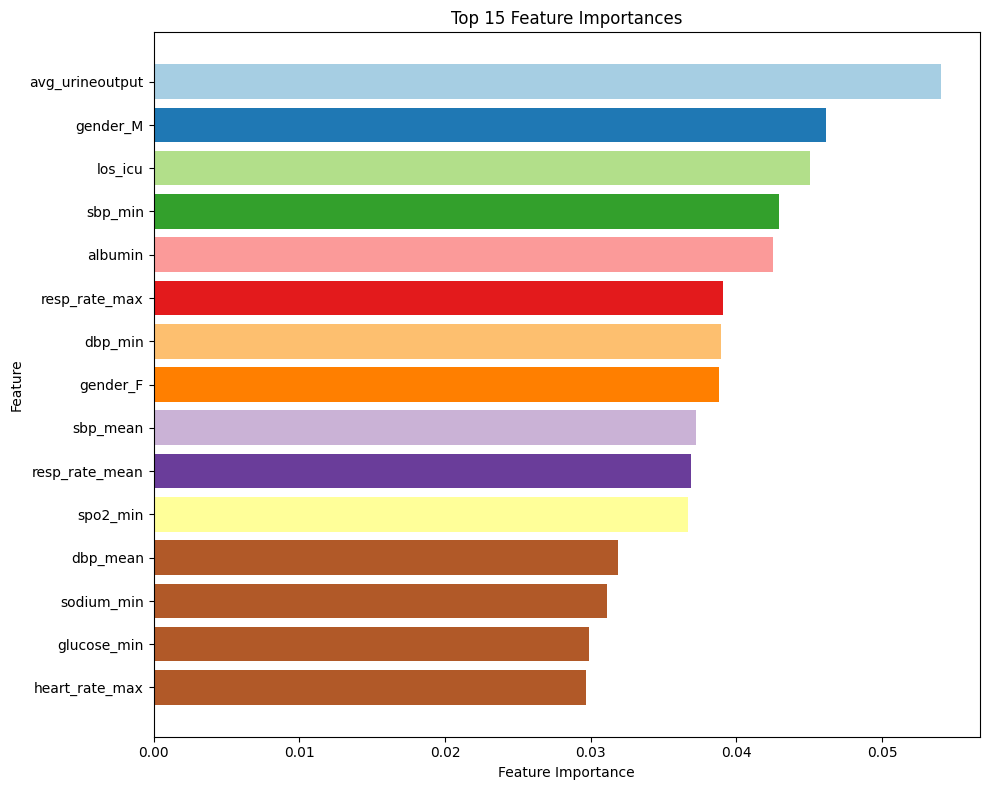

In [22]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data (replace X_smote and y_smote with your data)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get the names of the features (replace feature_names with your actual feature names)
feature_names = X_train.columns  # Replace with your feature names

# Sort feature importances and feature names in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx][:15]  # Select the top 15 feature importances
sorted_feature_names = [feature_names[i] for i in sorted_idx][:15]  # Select the corresponding feature names

# Create a vertical bar plot with different colors for each feature
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, color=plt.cm.Paired(np.arange(len(sorted_feature_names))))
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.tight_layout()
plt.savefig("Top 15 Feature Importances.pdf", format="pdf", bbox_inches="tight")
plt.show()

***SHAP Method***

In [ ]:
model = classifiers['RandomForest'].fit(X_smote, y_smote)

In [ ]:
!pip install SHAP

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 1603it [11:06,  2.39it/s]


In [ ]:
X_test

,Unnamed0,max_age,los_icu,sofa_score,avg_urineoutput,glucose_min,glucose_max,glucose_average,sodium_max,sodium_min,sodium_average,diabetes_without_cc,diabetes_with_cc,severe_liver_disease,aids,renal_disease,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,resp_rate_min,resp_rate_max,resp_rate_mean,spo2_min,spo2_max,spo2_mean,coma,albumin,race_BlackorAfricanAmerican,race_HispanicorLatin,race_Othersrace,race_White,antibiotic_Vancomycin,antibiotic_VancomycinAntibioticLock,antibiotic_VancomycinEnema,antibiotic_VancomycinIntrathecal,antibiotic_VancomycinOralLiquid,gender_F,gender_M
554,4653,82,3.540000,2,46.666667,96.000000,125.000000,104.500000,144.000000,137.000000,140.500000,0,0,0,0,1,71,117,91.542174,63.000000,136.000000,99.640152,41.000000,106.000000,64.393939,13.000000,36.000000,19.413913,77,100,96.603415,0,2.900000,0,0,0,1,1,0,0,0,0,0,1
6780,2185,79,3.167019,4,26.206178,86.558205,158.253845,124.504550,129.429872,127.650769,128.540320,0,0,0,0,0,71,96,85.189921,77.605898,137.000000,107.288649,26.791026,70.185128,43.602866,12.883590,29.092564,18.436922,89,99,96.102992,0,2.698808,0,0,0,1,1,0,0,0,0,1,0
3101,2106,57,3.580000,2,132.000000,131.000000,131.000000,131.000000,138.000000,138.000000,138.000000,0,0,1,0,0,64,98,80.260870,99.000000,147.000000,125.636364,48.000000,128.000000,80.909091,11.000000,23.000000,15.608696,92,99,96.043478,0,4.000000,0,0,0,1,1,0,0,0,0,1,0
7048,2054,74,3.546072,5,73.500905,75.954762,134.648298,113.334216,143.688436,134.798980,139.937177,0,0,0,0,0,47,133,90.242685,76.010034,174.618029,118.595117,35.396940,109.894556,61.365883,10.110544,35.778911,23.968993,66,100,94.332920,0,3.286939,0,0,0,1,1,0,0,0,0,1,0
2605,2602,83,1.790000,3,62.076923,83.000000,150.000000,108.000000,141.000000,131.000000,137.250000,0,0,0,0,0,58,113,85.065476,78.000000,160.000000,123.007143,38.000000,91.000000,60.130952,9.000000,27.000000,16.107143,95,100,97.852941,0,4.100000,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2252,39,9.580000,3,128.189189,103.000000,128.000000,115.500000,138.000000,132.000000,135.000000,0,0,0,0,0,91,124,103.470588,93.000000,130.000000,109.000000,55.000000,86.000000,68.081633,12.000000,52.000000,29.000000,93,97,94.745098,0,2.200000,0,0,0,1,1,0,0,0,0,1,0
1966,3241,68,3.580000,8,60.571429,106.000000,271.000000,188.500000,140.000000,135.000000,137.500000,0,0,0,0,1,52,98,69.333333,76.000000,152.000000,117.019231,34.000000,70.000000,52.403846,11.000000,28.000000,21.400000,84,100,94.083333,0,3.400000,0,0,0,1,1,0,0,0,0,0,1
6045,3965,71,2.170016,2,320.197379,58.459621,165.592411,118.139205,145.895935,137.921951,141.082836,0,0,0,0,0,69,167,98.656993,65.104065,150.653116,105.663559,34.043360,87.921951,56.857562,14.000000,37.078049,23.574451,79,100,97.025230,0,2.023415,0,0,0,1,1,0,0,0,0,0,1
1079,4128,67,3.080000,4,348.888889,33.000000,349.000000,157.000000,139.000000,131.000000,136.000000,1,1,1,0,0,72,129,96.610368,82.000000,196.000000,120.015568,39.000000,80.000000,57.539377,13.000000,30.000000,19.021465,93,100,98.823579,0,4.900000,0,0,0,1,1,0,0,0,0,0,1


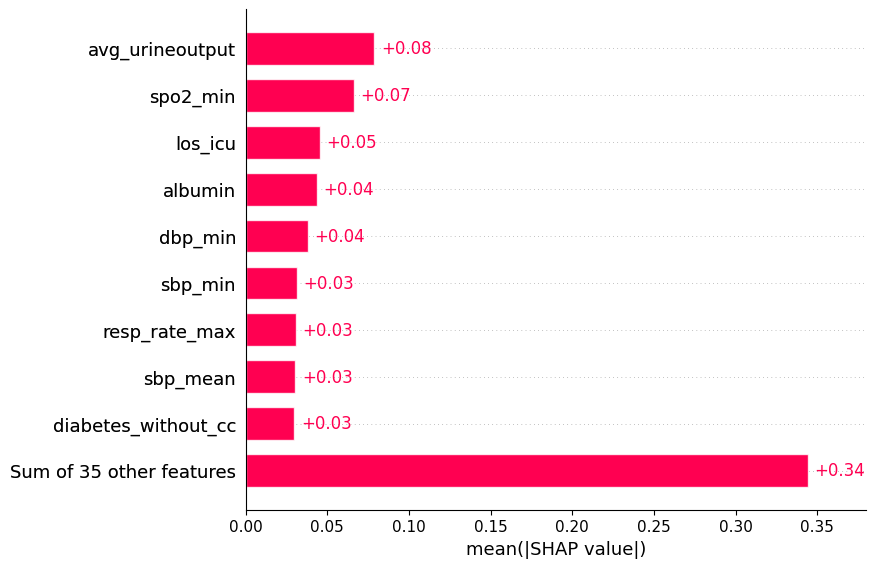

In [ ]:
shap.plots.bar(shap_values)

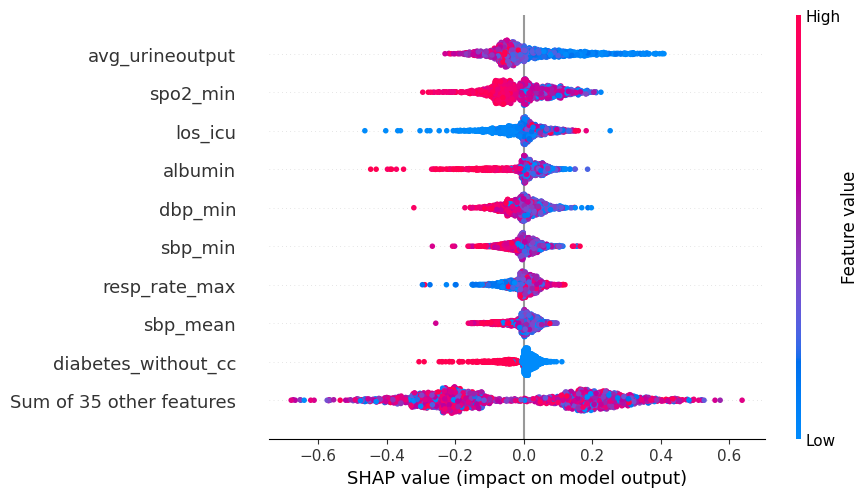

In [ ]:

shap.plots.beeswarm(shap_values)

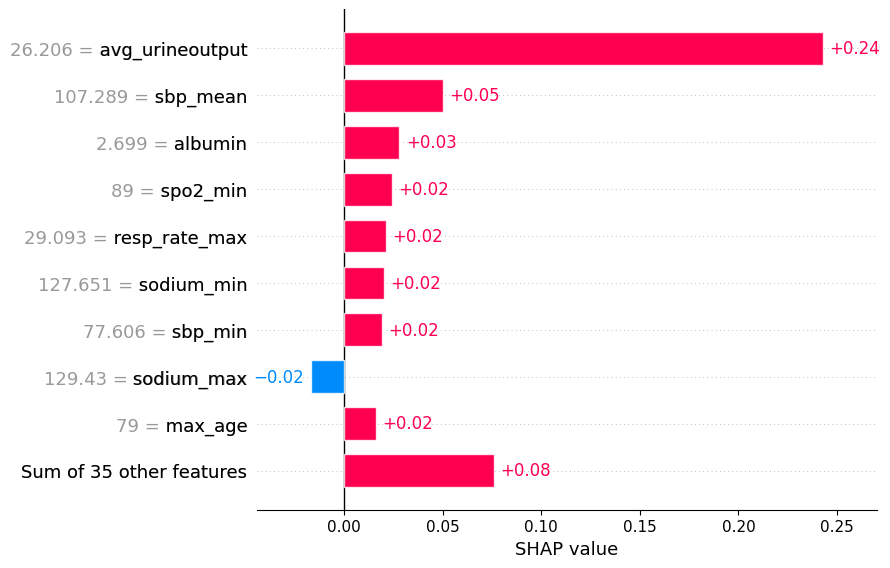

In [ ]:
shap.plots.bar(shap_values[1])

In [ ]:
print(df_reduced.columns)

Index(['Unnamed0', 'subject_id', 'hospital_expire_flag', 'max_age', 'los_icu',
       'first_hosp_stay', 'suspected_infection', 'sofa_score', 'sepsis3',
       'avg_urineoutput', 'glucose_min', 'glucose_max', 'glucose_average',
       'sodium_max', 'sodium_min', 'sodium_average', 'diabetes_without_cc',
       'diabetes_with_cc', 'severe_liver_disease', 'aids', 'renal_disease',
       'heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'sbp_min',
       'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean',
       'resp_rate_min', 'resp_rate_max', 'resp_rate_mean', 'spo2_min',
       'spo2_max', 'spo2_mean', 'coma', 'albumin',
       'race_BlackorAfricanAmerican', 'race_HispanicorLatin',
       'race_Othersrace', 'race_White', 'antibiotic_Vancomycin',
       'antibiotic_VancomycinAntibioticLock', 'antibiotic_VancomycinEnema',
       'antibiotic_VancomycinIntrathecal', 'antibiotic_VancomycinOralLiquid',
       'gender_F', 'gender_M'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split

# Assuming df_reduced is already loaded into the workspace

# Split your dataset into a train and test set
train, test = train_test_split(df_reduced, test_size=0.2)  # For example, 80% training, 20% test

# Select the numeric columns you want to compare
numeric_cols = [
    'los_icu', 'max_age', 'sofa_score', 'avg_urineoutput',# 'temperature_min','temperature_max', 'temperature_avg',
    'glucose_min', 'glucose_max',
    'glucose_average', 'sodium_min', 'sodium_max', 'sodium_average',
    'heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'sbp_min',
    'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean', 'resp_rate_min',
    'resp_rate_max', 'resp_rate_mean', 'spo2_min', 'spo2_max', 'spo2_mean'
]

# Initialize a DataFrame to store p-values and means
comparison = pd.DataFrame(index=numeric_cols, columns=['Train Mean', 'Test Mean', 'P-Value'])

# Calculate p-values and means for each variable between train and test sets
for col in numeric_cols:
    train_mean = train[col].dropna().mean()
    test_mean = test[col].dropna().mean()
    p_value = stats.ttest_ind(train[col].dropna(), test[col].dropna(), equal_var=False).pvalue

    comparison.loc[col, 'Train Mean'] = train_mean
    comparison.loc[col, 'Test Mean'] = test_mean
    comparison.loc[col, 'P-Value'] = p_value

# Print the resulting DataFrame with means and p-values
print(comparison)


                 Train Mean   Test Mean   P-Value
los_icu            6.534623    7.204645  0.036864
max_age            64.74724   64.889635  0.797656
sofa_score         4.432789    4.307102  0.138686
avg_urineoutput  173.964943  173.515602  0.911984
glucose_min      100.746279   100.81382  0.956976
glucose_max      227.217715   228.03263  0.885937
glucose_average  150.816938  149.881721  0.637737
sodium_min       133.701632  133.837812  0.510096
sodium_max       141.819731  142.166027  0.078239
sodium_average     137.8618  138.086572  0.157789
heart_rate_min    67.335334   67.456814  0.829645
heart_rate_max   117.296928  117.646833  0.659111
heart_rate_mean   88.550915    88.98125  0.413232
sbp_min           80.743768   80.430422  0.598703
sbp_max            158.1275  158.267284   0.88128
sbp_mean         115.653799  115.904387  0.606102
dbp_min           40.279165   39.920825  0.377515
dbp_max           98.453753   98.856526  0.621077
dbp_mean          62.187083   62.599121  0.231463


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

# Assuming df_reduced is already loaded into the workspace

# Split your dataset into a train and test set
train, test = train_test_split(df_reduced, test_size=0.2)  # For example, 80% training, 20% test

# Select the categorical columns you want to compare
categorical_cols = [
    'hospital_expire_flag','diabetes_without_cc', 'diabetes_with_cc', 'severe_liver_disease','aids',
    'renal_disease',
    #'antibiotic_Carbapenem','antibiotic_Aminoglycoside','antibiotic_Glycopeptide','antibiotic_Oxazolidinone','antibiotic_Penicillin',
    #'antibiotic_Sulfonamide','antibiotic_Tetracycline',
    'gender_F'
]

# Initialize a DataFrame to store Chi-Square p-values and percentage of ones
comparison = pd.DataFrame(index=categorical_cols, columns=['Chi-Square P-Value', 'Percentage of Ones'])

# Calculate Chi-Square p-values and percentage of ones for each categorical variable between train and test sets
for col in categorical_cols:
    train_values = train[col].value_counts()
    test_values = test[col].value_counts()

    # Create a set of all unique categories across both train and test sets
    all_categories = set(train_values.index) | set(test_values.index)

    # Ensure that both train and test sets have counts for all categories
    train_values = train_values.reindex(all_categories, fill_value=0)
    test_values = test_values.reindex(all_categories, fill_value=0)

    # Create a contingency table
    contingency_table = pd.DataFrame({'Train': train_values, 'Test': test_values})

    # Calculate Chi-Square p-value
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Calculate the percentage of ones in the test set
    total_ones_test = test_values.get(1, 0)
    total_values_test = test_values.sum()
    percentage_ones = (total_ones_test / total_values_test) * 100

    comparison.loc[col, 'Chi-Square P-Value'] = p
    comparison.loc[col, 'Percentage of Ones'] = percentage_ones

# Print the resulting DataFrame with Chi-Square p-values and percentage of ones
print(comparison)


                     Chi-Square P-Value Percentage of Ones
hospital_expire_flag           0.857014          22.840691
diabetes_without_cc              0.3121          31.381958
diabetes_with_cc               0.329009          15.930902
severe_liver_disease           0.786242          14.203455
aids                           0.934644           1.631478
renal_disease                  0.015137          28.502879
gender_F                       0.442302          42.706334


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

# Assuming df_reduced is already loaded into the workspace

# Split your dataset into a train and test set
train, test = train_test_split(df_reduced, test_size=0.2)  # For example, 80% training, 20% test

# Select the categorical columns you want to compare
categorical_cols = [
    'hospital_expire_flag','diabetes_without_cc', 'diabetes_with_cc', 'severe_liver_disease','aids',
    'renal_disease',
    #'antibiotic_Carbapenem','antibiotic_Aminoglycoside',
    #'antibiotic_Glycopeptide','antibiotic_Oxazolidinone','antibiotic_Penicillin',
    #'antibiotic_Sulfonamide','antibiotic_Tetracycline',
    'gender_F'
]

# Initialize a DataFrame to store Chi-Square p-values and percentage of ones
comparison = pd.DataFrame(index=categorical_cols, columns=['Chi-Square P-Value', 'Percentage of Ones (Train)', 'Percentage of Ones (Test)'])

# Calculate Chi-Square p-values, train percentages of ones, and test percentages of ones for each categorical variable
for col in categorical_cols:
    train_values = train[col].value_counts()
    test_values = test[col].value_counts()

    # Create a set of all unique categories across both train and test sets
    all_categories = set(train_values.index) | set(test_values.index)

    # Ensure that both train and test sets have counts for all categories
    train_values = train_values.reindex(all_categories, fill_value=0)
    test_values = test_values.reindex(all_categories, fill_value=0)

    # Create a contingency table
    contingency_table = pd.DataFrame({'Train': train_values, 'Test': test_values})

    # Calculate Chi-Square p-value
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Calculate the percentage of ones in train and test sets
    train_percentage_ones = (train[col] == 1).sum() / len(train) * 100
    test_percentage_ones = (test[col] == 1).sum() / len(test) * 100

    comparison.loc[col, 'Chi-Square P-Value'] = p
    comparison.loc[col, 'Percentage of Ones (Train)'] = train_percentage_ones
    comparison.loc[col, 'Percentage of Ones (Test)'] = test_percentage_ones

# Print the resulting DataFrame with Chi-Square p-values and percentages of ones in train and test sets
print(comparison)


                     Chi-Square P-Value Percentage of Ones (Train)  \
hospital_expire_flag           0.500775                  23.307729   
diabetes_without_cc              0.0008                  28.972636   
diabetes_with_cc               0.848903                  14.978397   
severe_liver_disease           0.209672                  14.834373   
aids                           0.376822                   1.800288   
renal_disease                  0.485274                  31.445031   
gender_F                       0.891922                  41.550648   

                     Percentage of Ones (Test)  
hospital_expire_flag                 22.264875  
diabetes_without_cc                  34.357006  
diabetes_with_cc                     14.683301  
severe_liver_disease                 13.243762  
aids                                   1.34357  
renal_disease                        32.629559  
gender_F                              41.84261  


In [ ]:
import pandas as pd

# Assuming df_reduced is already loaded into the workspace

# Generate a statistical summary for both numeric and categorical columns
summary = df_reduced.describe(include='all')

# Print the summary statistics
print(summary)


           Unnamed0    subject_id  hospital_expire_flag     max_age  \
count   5208.000000  5.208000e+03           5208.000000  5208.00000   
unique          NaN           NaN                   NaN         NaN   
top             NaN           NaN                   NaN         NaN   
freq            NaN           NaN                   NaN         NaN   
mean    2603.500000  1.501884e+07              0.230991    64.77573   
std     1503.564432  2.886479e+06              0.421507    15.83041   
min        0.000000  1.000201e+07              0.000000    19.00000   
25%     1301.750000  1.254311e+07              0.000000    55.00000   
50%     2603.500000  1.498578e+07              0.000000    66.00000   
75%     3905.250000  1.755050e+07              0.000000    76.00000   
max     5207.000000  1.999789e+07              1.000000   101.00000   

            los_icu first_hosp_stay  suspected_infection   sofa_score sepsis3  \
count   5208.000000            5208               5208.0  5208.000